### G67 vs G61
Compare run 67 vs 61

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot, yzplot 
from mom6_tools.m6toolbox import genBasinMasks
warnings.filterwarnings("ignore")

Basemap module not found. Some regional plots may not function properly


In [2]:
path = '/glade/scratch/gmarques/'
case = ['g.c2b6.GJRA.TL319_t061.long_JRA_mct.061']
grd = MOM6grid('/glade/scratch/gmarques/'+str(case[0])+'/run/'+str(case[0])+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

MOM6 grid successfully loaded... 

11.16427964664149 64.78854837178643 [391, 434]


### Gibraltar strait

MOM6 grid successfully loaded... 



Text(0.5, 1.0, 'OM4_025')

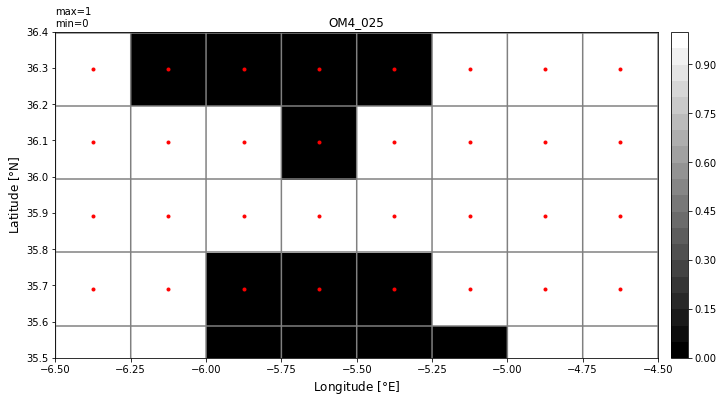

In [3]:
%matplotlib inline
grd_OM4 = MOM6grid('/glade/scratch/gmarques/OM4_025/19000101.ocean_static.nc')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
xyplot(grd_OM4.wet, grd_OM4.geolon, grd_OM4.geolat, axis=ax, colormap=plt.cm.binary_r)
ax.plot(grd_OM4.geolon_c, grd_OM4.geolat_c, '-', color='gray')
ax.plot(grd_OM4.geolon_c.transpose(), grd_OM4.geolat_c.transpose(), '-', color='gray')

ax.plot(grd_OM4.geolon, grd_OM4.geolat, 'r.')
ax.set_xlim(-6.5,-4.5)
ax.set_ylim(35.5,36.4)
ax.set_title('OM4_025')

#### This is what GFLD's uses: 
U_width,  -5.9,  -5.4, 35.8, 36.2,  12000.0  ! Gibraltar

Text(0.5, 1.0, 'tx0.6')

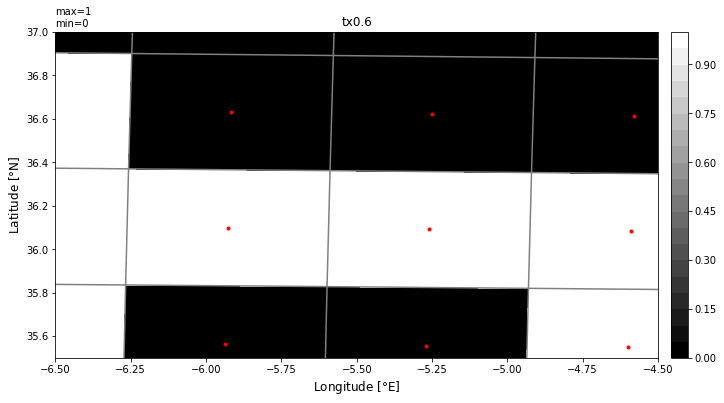

In [4]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
xyplot(grd.wet, grd.geolon, grd.geolat, axis=ax, colormap=plt.cm.binary_r)
ax.plot(grd.geolon_c, grd.geolat_c, '-', color='gray')
ax.plot(grd.geolon_c.transpose(), grd.geolat_c.transpose(), '-', color='gray')

ax.plot(grd.geolon, grd.geolat, 'r.')
ax.set_xlim(-6.5,-4.5)
ax.set_ylim(35.5,37)
ax.set_title('tx0.6')

#### Proposed values for tx0.6:
U_width,  -6.50,  -5.0, 35.8, 36.4,  12000.0  ! Gibraltar

In [9]:
path = '/glade/scratch/gmarques/'
exps = ['g.c2b6.GJRA.TL319_t061.long_JRA_mct.061','g.c2b6.GJRA.TL319_t061.long_JRA_mct.067']
labels = ['G61','G67']

## T/S bias at selected vertical levels

In [10]:
# load PHC2 data
phc_path = '/glade/p/cesm/omwg/obs_data/phc/'
phc_temp_mom = xr.open_mfdataset(phc_path+'PHC2_TEMP_tx0.66v1_34lev_ann_avg.nc', 
                             decode_coords=False, decode_times=False)
phc_salt_mom = xr.open_mfdataset(phc_path+'PHC2_SALT_tx0.66v1_34lev_ann_avg.nc', 
                             decode_coords=False, decode_times=False)

Temperature

In [11]:
ds_mom1_t = xr.open_mfdataset(path+exps[0]+'/run/*mom6.h_002?.nc')['thetao'].mean('time')
ds_mom2_t = xr.open_mfdataset(path+exps[1]+'/run/*mom6.h_002?.nc')['thetao'].mean('time')

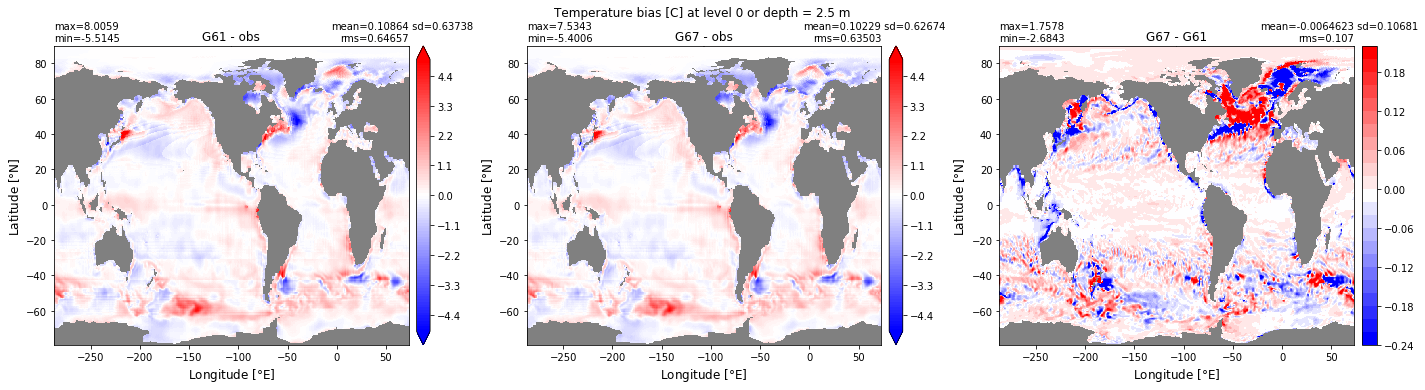

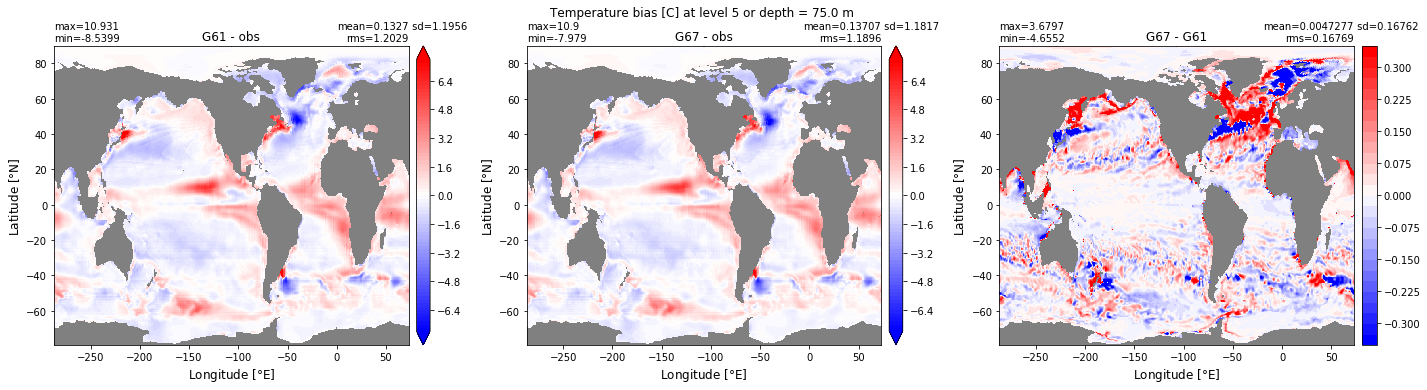

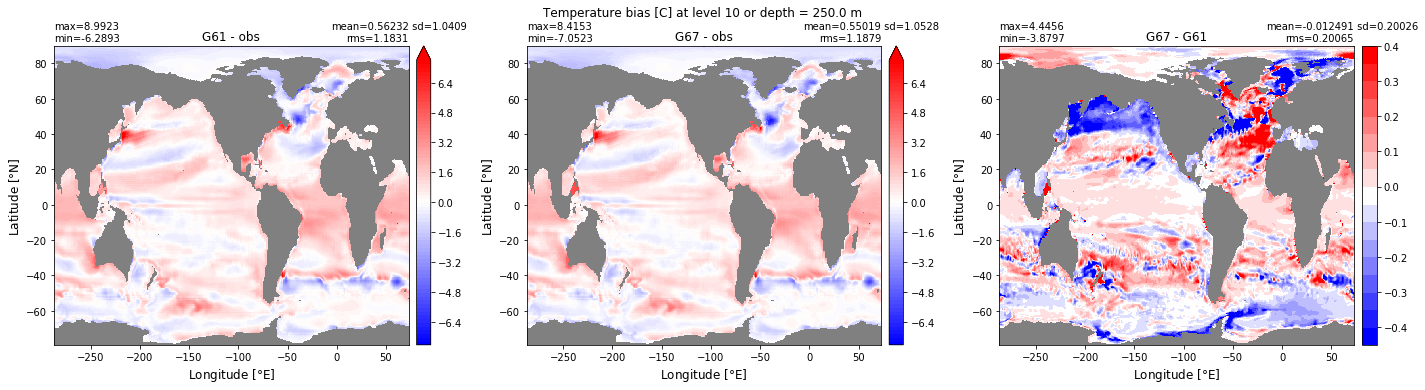

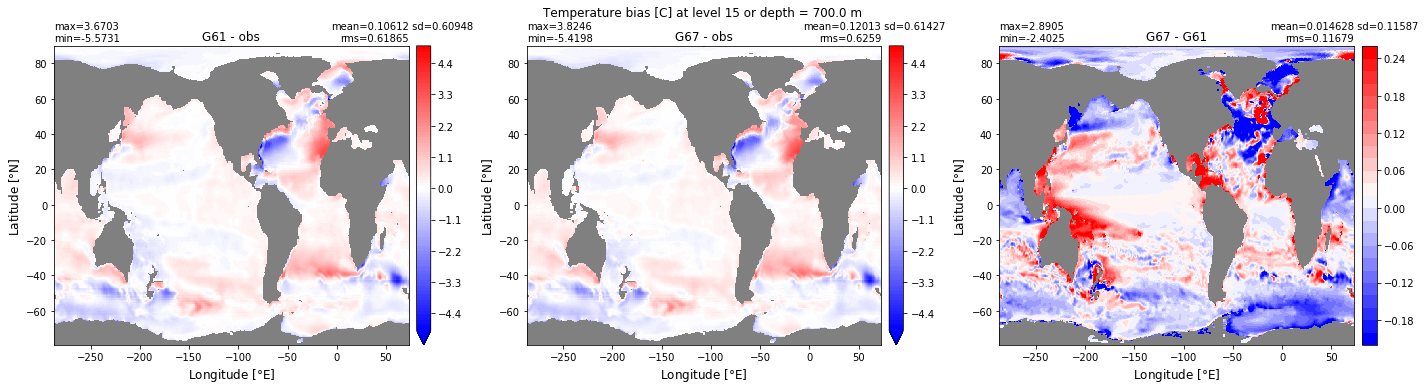

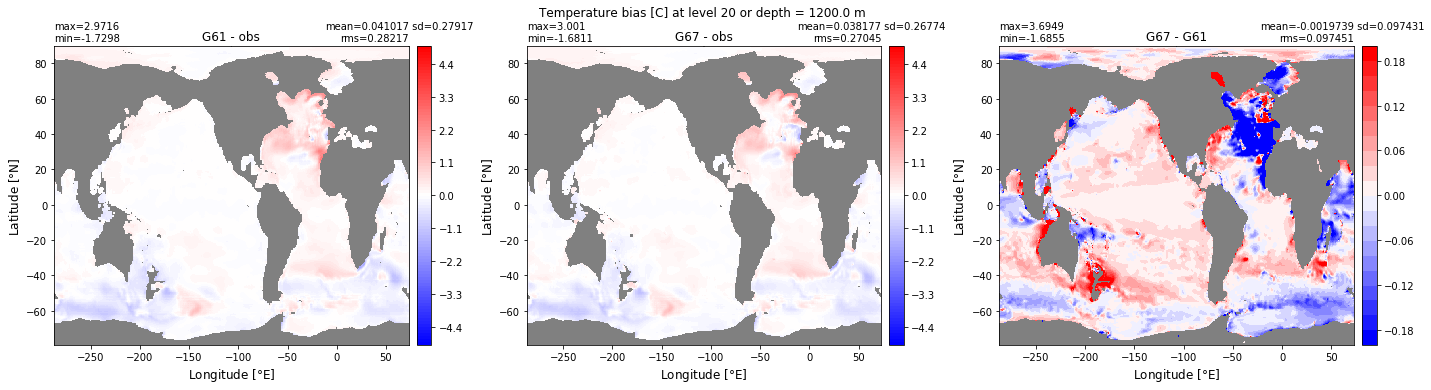

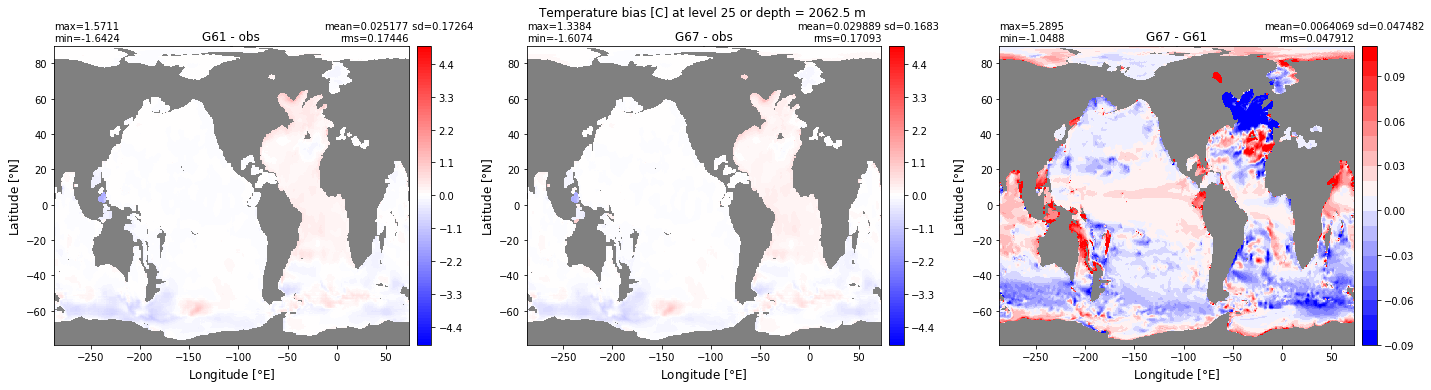

In [28]:
%matplotlib inline
# change k indice to see bias at other depths
levels=[0,5,10,15,20,25]
tlim=[5,7.5,7.5,5,5,5]
for k,t in zip(levels,tlim):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5.5))
  ax1 = ax.flatten()
  temp_mom1 = np.ma.masked_invalid(ds_mom1_t[k,:].values)
  temp_mom2 = np.ma.masked_invalid(ds_mom2_t[k,:].values)
  temp_mom_obs = np.ma.masked_invalid(phc_temp_mom['TEMP'][k,:].values)
  
  plt.suptitle('Temperature bias [C] at level {} or depth = {} m'.format(k, 
               phc_temp_mom.depth[k].values))
  xyplot(temp_mom1-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[0]+' - obs'), axis=ax1[0], 
         clim=(-t,t), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
  xyplot(temp_mom2-temp_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[1]+' - obs'), axis=ax1[1], 
         clim=(-t,t), nbins=100, colormap=plt.cm.bwr, centerlabels=True)
  xyplot(temp_mom2-temp_mom1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[1]+' - '+labels[0]), axis=ax1[2], 
         nbins=30, colormap=plt.cm.bwr)

In [13]:
ds_mom1_s = xr.open_mfdataset(path+exps[0]+'/run/*mom6.h_002?.nc')['so'].mean('time')
ds_mom2_s = xr.open_mfdataset(path+exps[1]+'/run/*mom6.h_002?.nc')['so'].mean('time')

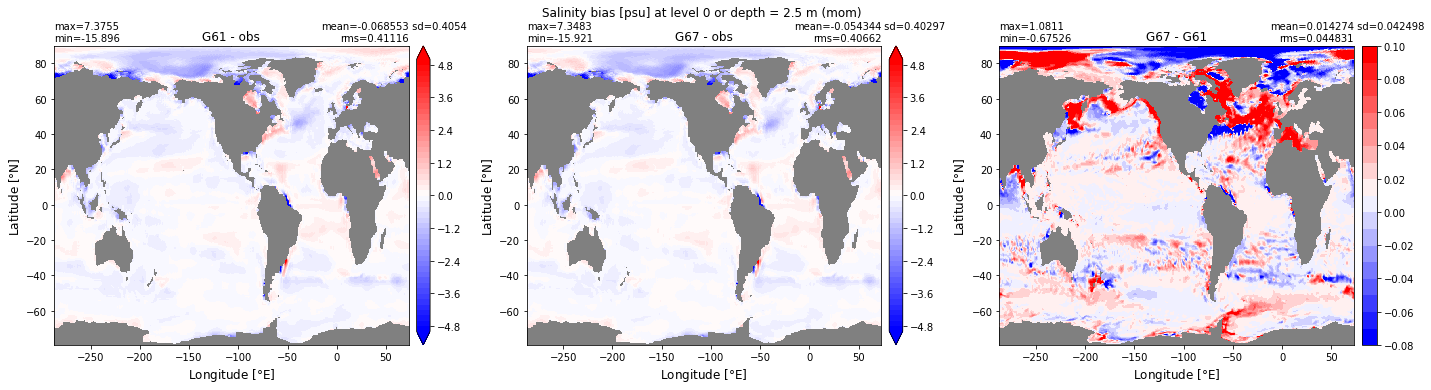

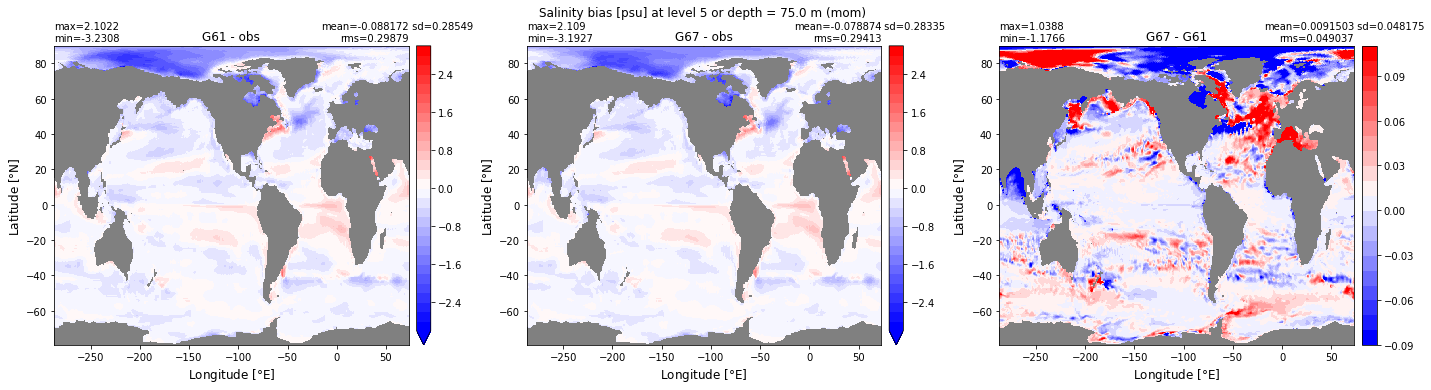

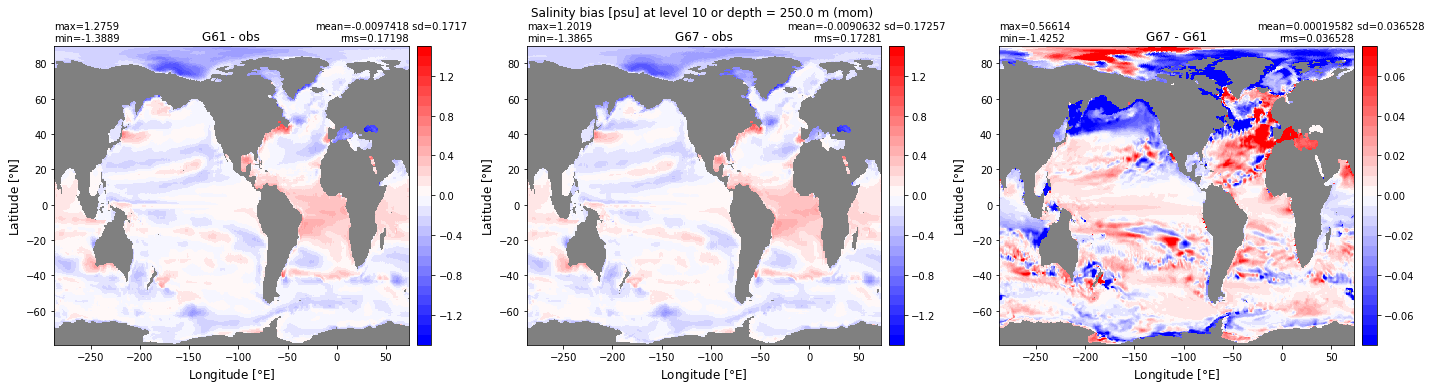

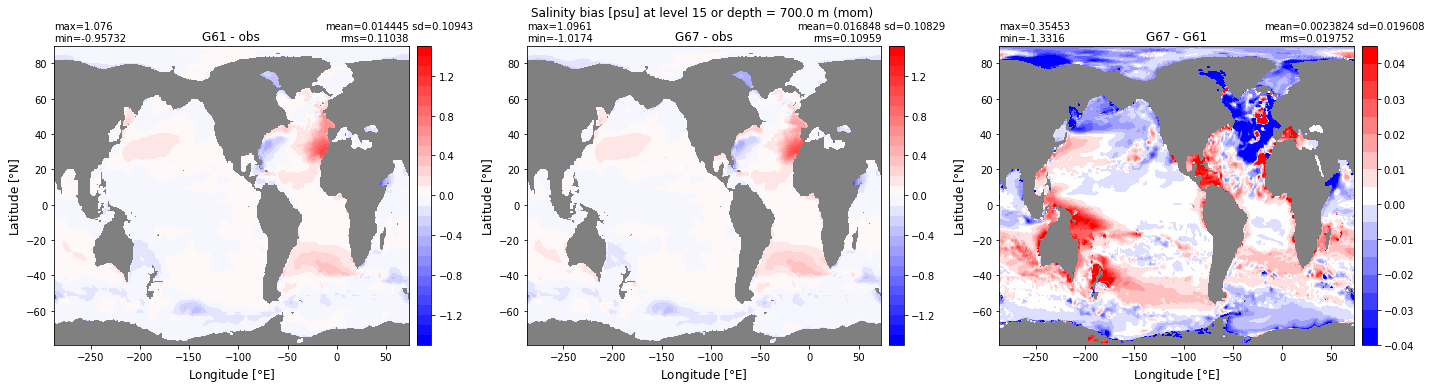

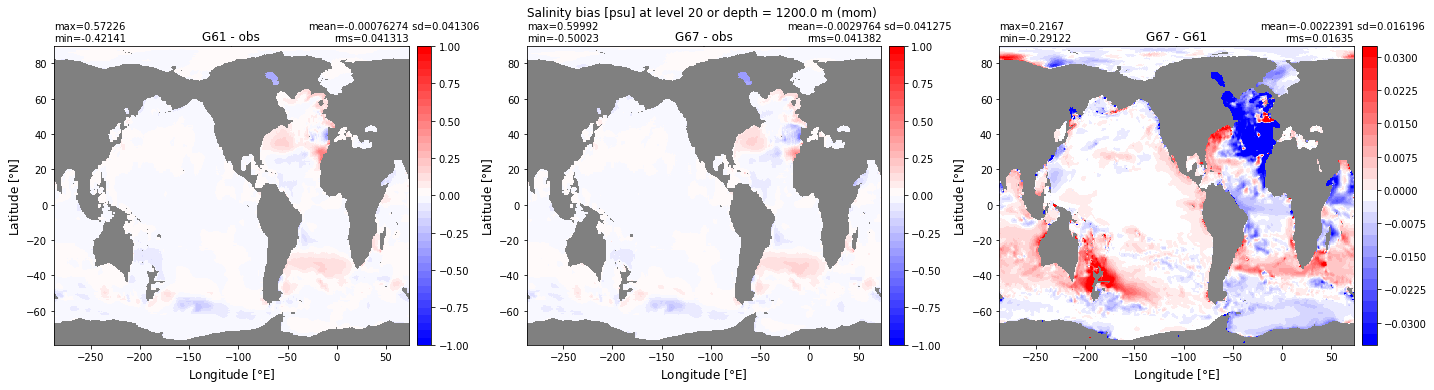

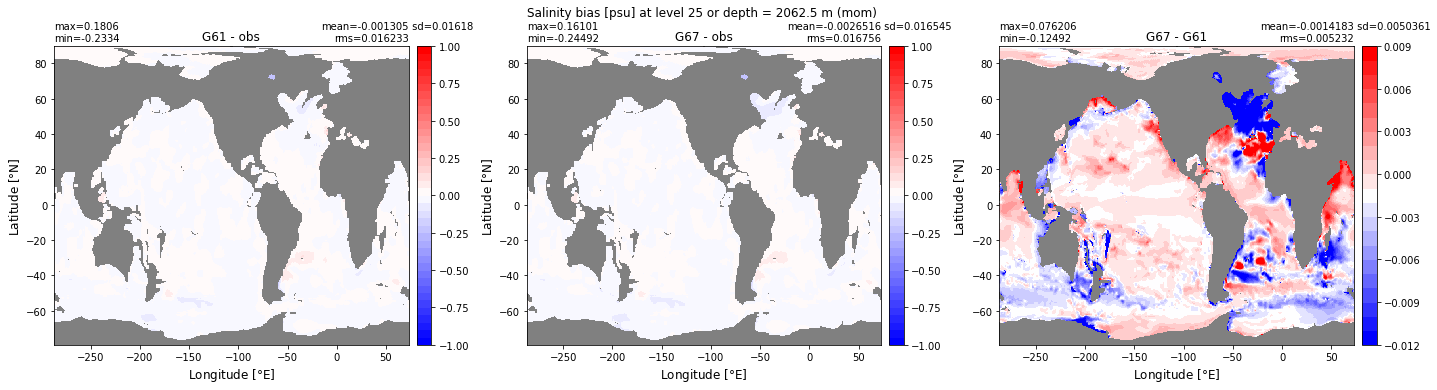

In [27]:
%matplotlib inline
# change k indice to see bias at other depths
levels=[0,5,10,15,20,25]
slim=[5,3,1.5,1.5,1,1]
for k,s in zip(levels,slim):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5.5))
  ax1 = ax.flatten()
  salt_mom1 = np.ma.masked_invalid(ds_mom1_s[k,:].values)
  salt_mom2 = np.ma.masked_invalid(ds_mom2_s[k,:].values)
  salt_mom_obs = np.ma.masked_invalid(phc_salt_mom['SALT'][k,:].values)
  
  plt.suptitle('Salinity bias [psu] at level {} or depth = {} m (mom)'.format(k, 
               phc_salt_mom.depth[k].values))
  xyplot(salt_mom1-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[0]+' - obs'), axis=ax1[0], 
         clim=(-s,s), nbins=50, colormap=plt.cm.bwr, centerlabels=True)
  xyplot(salt_mom2-salt_mom_obs, grd.geolon, grd.geolat, grd.area_t, title=str(labels[1]+' - obs'), axis=ax1[1], 
         clim=(-s,s), nbins=50, colormap=plt.cm.bwr, centerlabels=True)
  xyplot(salt_mom2-salt_mom1, grd.geolon, grd.geolat, grd.area_t, title=str(labels[1]+' - '+labels[0]), axis=ax1[2], 
         nbins=30, colormap=plt.cm.bwr)

# Zonally averaged T/S Bias  

### Global

In [17]:
# MOM
# reconstruct interfaces
elev_mom = np.concatenate([0,np.diff(ds_mom1_t.z_l).cumsum(),6000.], axis=None)
[_, z_mom] = np.meshgrid(ds_mom1_t.yh.values, -elev_mom)

mom1_temp_bias = xr.DataArray((ds_mom1_t.values) - (phc_temp_mom.TEMP.values), dims=('z_l', 'yh','xh'), 
                             coords={'z_l':ds_mom1_t.z_l, 'yh': ds_mom1_t.yh, 'xh':ds_mom1_t.xh})
mom1_salt_bias = xr.DataArray((ds_mom1_s.values) - (phc_salt_mom.SALT.values), dims=('z_l', 'yh','xh'), 
                             coords={'z_l':ds_mom1_t.z_l, 'yh': ds_mom1_t.yh, 'xh':ds_mom1_t.xh})

mom2_temp_bias = xr.DataArray((ds_mom2_t.values) - (phc_temp_mom.TEMP.values), dims=('z_l', 'yh','xh'), 
                             coords={'z_l':ds_mom2_t.z_l, 'yh': ds_mom2_t.yh, 'xh':ds_mom2_t.xh})
mom2_salt_bias = xr.DataArray((ds_mom2_s.values) - (phc_salt_mom.SALT.values), dims=('z_l', 'yh','xh'), 
                             coords={'z_l':ds_mom2_t.z_l, 'yh': ds_mom2_t.yh, 'xh':ds_mom2_t.xh})


area_mom = xr.DataArray(np.ma.masked_where(grd.wet == 0,grd.area_t), dims=('yh','xh'), coords={'yh': ds_mom1_t.yh, 'xh':ds_mom1_t.xh})

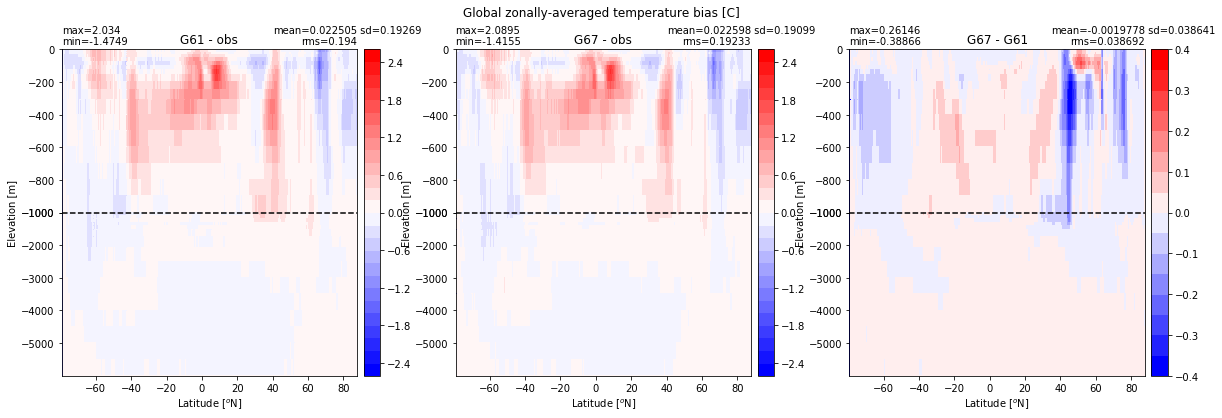

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharex=True)
ax1 = ax.flatten()
plt.suptitle('Global zonally-averaged temperature bias [C]')
mom1_temp_global = ((mom1_temp_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom2_temp_global = ((mom2_temp_bias * area_mom).sum('xh')/area_mom.sum('xh'))


yzplot(np.ma.masked_invalid(mom1_temp_global), ds_mom1_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[0]+' - obs'), 
       axis=ax1[0], nbins=30, colormap=plt.cm.bwr, clim=(-2.5, 2.5), centerlabels=True, splitscale=[0, -1000,-6000]); ax1[0].invert_yaxis()

yzplot(np.ma.masked_invalid(mom2_temp_global), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - obs'), 
       axis=ax1[1], nbins=30, colormap=plt.cm.bwr, clim=(-2.5, 2.5), centerlabels=True, splitscale=[0, -1000,-6000]); ax1[1].invert_yaxis()

yzplot(np.ma.masked_invalid(mom2_temp_global-mom1_temp_global), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - '+labels[0]), 
       axis=ax1[2], nbins=30, colormap=plt.cm.bwr, splitscale=[0, -1000,-6000], centerlabels=True, clim=(-0.4, 0.4))
ax1[2].invert_yaxis()


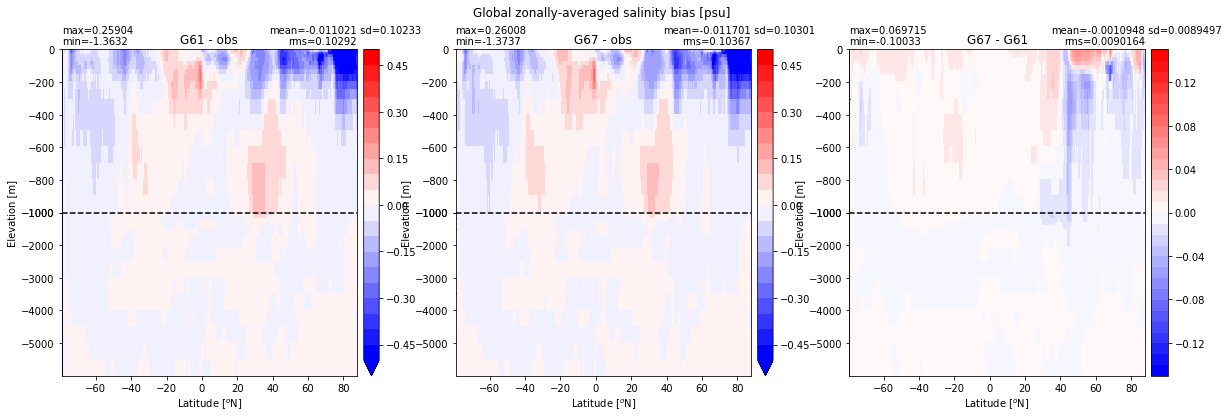

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharex=True)
ax1 = ax.flatten()
plt.suptitle('Global zonally-averaged salinity bias [psu]')
mom1_salt_global = ((mom1_salt_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom2_salt_global = ((mom2_salt_bias * area_mom).sum('xh')/area_mom.sum('xh'))

yzplot(np.ma.masked_invalid(mom1_salt_global), ds_mom1_s.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[0]+' - obs'), 
       axis=ax1[0], nbins=30, colormap=plt.cm.bwr, clim=(-0.5, 0.5), centerlabels=True, splitscale=[0, -1000,-6000]); ax1[0].invert_yaxis()
yzplot(np.ma.masked_invalid(mom2_salt_global), ds_mom2_s.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - obs'), 
       axis=ax1[1], nbins=30, colormap=plt.cm.bwr, clim=(-0.5, 0.5), centerlabels=True, splitscale=[0, -1000,-6000]); ax1[1].invert_yaxis()
yzplot(np.ma.masked_invalid(mom2_salt_global-mom1_salt_global), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - '+labels[0]), 
       axis=ax1[2], nbins=30, colormap=plt.cm.bwr, splitscale=[0, -1000,-6000], centerlabels=True, clim=(-0.15, 0.15))
ax1[2].invert_yaxis()

### Atlantic

In [38]:
mom1_temp_alt = ((basin_code.sel(region='AtlanticOcean')*mom1_temp_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom1_salt_alt = ((basin_code.sel(region='AtlanticOcean')*mom1_salt_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom2_temp_alt = ((basin_code.sel(region='AtlanticOcean')*mom2_temp_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom2_salt_alt = ((basin_code.sel(region='AtlanticOcean')*mom2_salt_bias * area_mom).sum('xh')/area_mom.sum('xh'))

(-41, 75)

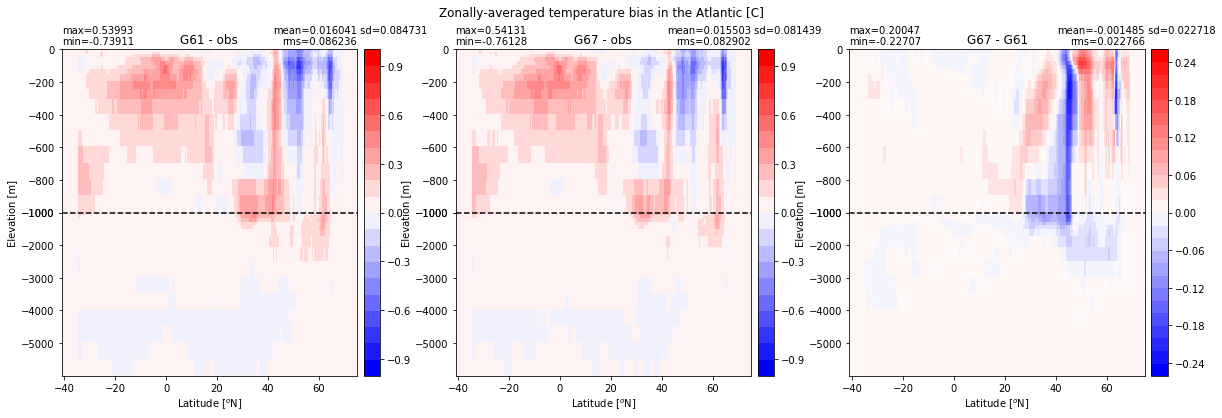

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharex=True)
ax1 = ax.flatten()
plt.suptitle('Zonally-averaged temperature bias in the Atlantic [C]')
yzplot(np.ma.masked_invalid(mom1_temp_alt.transpose()), ds_mom1_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[0]+' - obs'), 
       axis=ax1[0], nbins=30, colormap=plt.cm.bwr, clim=(-1, 1), centerlabels=True, splitscale=[0, -1000,-6000])
ax1[0].invert_yaxis(); ax1[0].set_xlim(-41,75)

yzplot(np.ma.masked_invalid(mom2_temp_alt.transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - obs'), 
       axis=ax1[1], nbins=30, colormap=plt.cm.bwr, clim=(-1, 1), centerlabels=True, splitscale=[0, -1000,-6000])
ax1[1].invert_yaxis(); ax1[1].set_xlim(-41,75)

yzplot(np.ma.masked_invalid(mom2_temp_alt.transpose()-mom1_temp_alt.transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - '+labels[0]), 
       axis=ax1[2], nbins=30, colormap=plt.cm.bwr, splitscale=[0, -1000,-6000], centerlabels=True, clim=(-0.25, 0.25))
ax1[2].invert_yaxis(); ax1[2].set_xlim(-41,75)


(-41, 75)

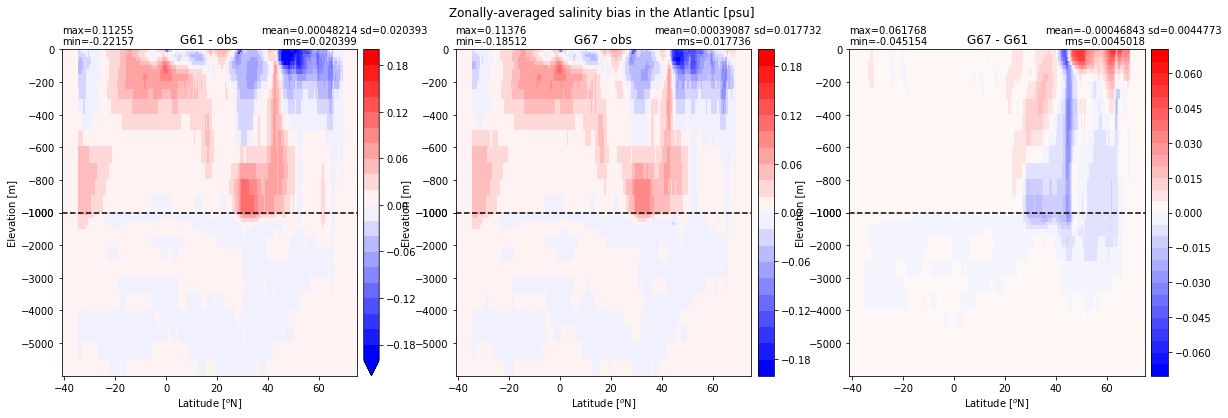

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax1 = ax.flatten()
plt.suptitle('Zonally-averaged salinity bias in the Atlantic [psu]')

yzplot(np.ma.masked_invalid(mom1_salt_alt.transpose()), ds_mom1_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[0]+' - obs'), 
       axis=ax1[0], nbins=30, colormap=plt.cm.bwr, clim=(-0.2, 0.2), centerlabels=True, splitscale=[0, -1000,-6000])
ax1[0].invert_yaxis(); ax1[0].set_xlim(-41,75)
yzplot(np.ma.masked_invalid(mom2_salt_alt.transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - obs'), 
       axis=ax1[1], nbins=30, colormap=plt.cm.bwr, clim=(-0.2, 0.2), centerlabels=True, splitscale=[0, -1000,-6000])
ax1[1].invert_yaxis(); ax1[1].set_xlim(-41,75)
yzplot(np.ma.masked_invalid((mom2_salt_alt-mom1_salt_alt).transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$N', title=str(labels[1]+' - '+labels[0]), 
       axis=ax1[2], nbins=30, colormap=plt.cm.bwr, splitscale=[0, -1000,-6000], centerlabels=True, clim=(-0.07, 0.07))
ax1[2].invert_yaxis(); ax1[2].set_xlim(-41,75)

### Med Sea

In [44]:
mom1_temp_med = ((basin_code.sel(region='MedSea')*mom1_temp_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom1_salt_med = ((basin_code.sel(region='MedSea')*mom1_salt_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom2_temp_med = ((basin_code.sel(region='MedSea')*mom2_temp_bias * area_mom).sum('xh')/area_mom.sum('xh'))
mom2_salt_med = ((basin_code.sel(region='MedSea')*mom2_salt_bias * area_mom).sum('xh')/area_mom.sum('xh'))

(30, 48)

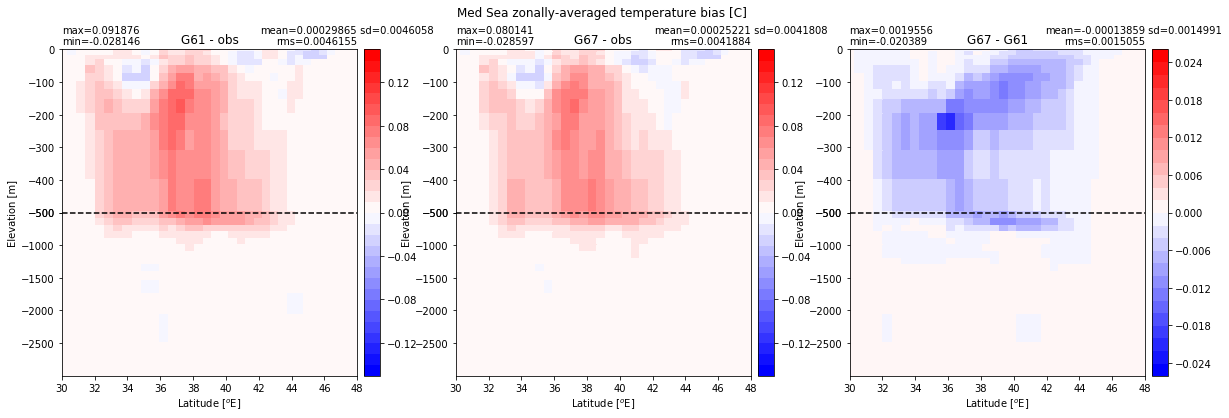

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax1 = ax.flatten()
plt.suptitle('Med Sea zonally-averaged temperature bias [C]')
yzplot(np.ma.masked_invalid(mom1_temp_med.transpose()), ds_mom1_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$E', title=str(labels[0]+' - obs'), 
       axis=ax1[0], nbins=30, colormap=plt.cm.bwr, clim=(-0.15, 0.15), centerlabels=True, splitscale=[0, -500,-3000])
ax1[0].invert_yaxis(); ax1[0].set_xlim(30,48)
yzplot(np.ma.masked_invalid(mom2_temp_med.transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$E', title=str(labels[1]+' - obs'), 
       axis=ax1[1], nbins=30, colormap=plt.cm.bwr, clim=(-0.15, 0.15), centerlabels=True, splitscale=[0, -500,-3000])
ax1[1].invert_yaxis(); ax1[1].set_xlim(30,48)

yzplot(np.ma.masked_invalid((mom2_temp_med-mom1_temp_med).transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$E', title=str(labels[1]+' - '+labels[0]), 
       axis=ax1[2], nbins=30, colormap=plt.cm.bwr, splitscale=[0, -500,-3000], centerlabels=True, clim=(-0.025, 0.025))
ax1[2].invert_yaxis(); ax1[2].set_xlim(30,48)


(30, 48)

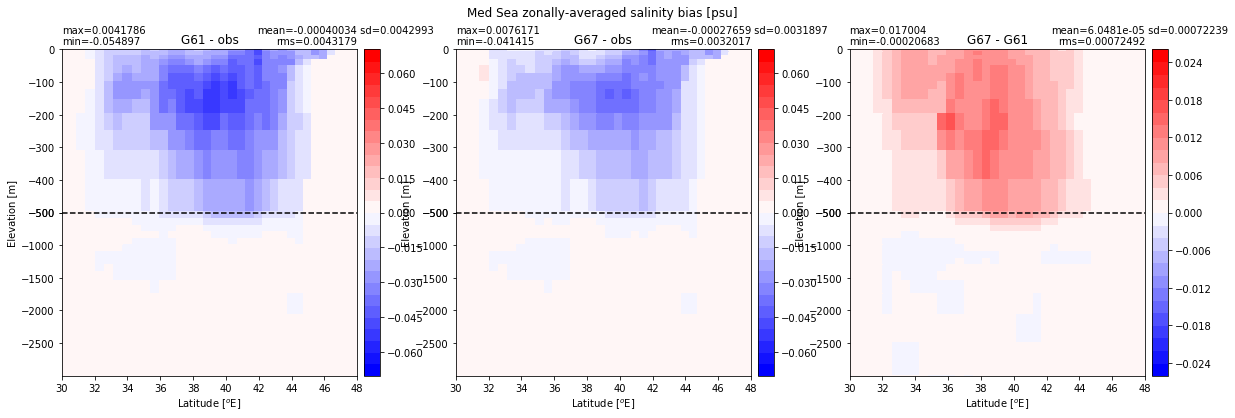

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax1 = ax.flatten()
plt.suptitle('Med Sea zonally-averaged salinity bias [psu]')
yzplot(np.ma.masked_invalid(mom1_salt_med.transpose()), ds_mom1_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$E', title=str(labels[0]+' - obs'), 
       axis=ax1[0], nbins=30, colormap=plt.cm.bwr, clim=(-0.07, 0.07), centerlabels=True, splitscale=[0, -500,-3000])
ax1[0].invert_yaxis(); ax1[0].set_xlim(30,48)
yzplot(np.ma.masked_invalid(mom2_salt_med.transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$E', title=str(labels[1]+' - obs'), 
       axis=ax1[1], nbins=30, colormap=plt.cm.bwr, clim=(-0.07, 0.07), centerlabels=True, splitscale=[0, -500,-3000])
ax1[1].invert_yaxis(); ax1[1].set_xlim(30,48)

yzplot(np.ma.masked_invalid((mom2_salt_med-mom1_salt_med).transpose()), ds_mom2_t.yh.values, z_mom, ylabel='Latitude', yunits='$^o$E', title=str(labels[1]+' - '+labels[0]), 
       axis=ax1[2], nbins=30, colormap=plt.cm.bwr, splitscale=[0, -500,-3000], centerlabels=True, clim=(-0.025, 0.025))
ax1[2].invert_yaxis(); ax1[2].set_xlim(30,48)
